# Exploring Air Traffic Landings at San Francisco International Airport

# Table of Contents
1. [Introduction](#introduction)
2. [Skills and Tools Used](#skills-and-tools-used)
3. [Objectives](#objectives)
4. [Data](#data)
5. [Data Loading and Initial Exploration](#data-loading-and-initial-exploration)
6. [Data Cleaning](#data-cleaning)
    1. [Drop Unused Columns](#drop-unused-columns)
    2. [Convert Column Names to Snake Case](#convert-column-names-to-snake-case)
    3. [Convert activity_period Column to Date Data Type](#convert-activity_period-column-to-date-data-type)
    4. [Dealing with Missing Values](#dealing-with-missing-values)
    5. [Clean Airline Names in the published_airline Column](#clean-airline-names-in-the-published_airline-column)
    6. [Checking for Duplicated Data](#checking-for-duplicated-data)
7. [Exploratory Data Analysis](#exploratory-data-analysis)
    1. [Monthly and Seasonal Trends](#monthly-and-seasonal-trends)
    2. [Airline Analysis](#airline-analysis)
    3. [Airline Geographical Analysis](#airline-geographical-analysis)
    4. [Aircraft Segmentation Analysis](#aircraft-segmentation-analysis)
    5. [Airport Operations](#airport-operations)
8. [Conclusion](#conclusion)

# Introduction

Aircraft landing data can provide valuable insights into an airport's operations. This project seeks to explore air traffic landing data for San Francisco International Airport (SFO) for the period July 1999 to March 2024 to gain a deeper understanding of the airport's operational dynamics, capacity requirements, and potential areas for improvement.

The analysis will focus on several key areas:

1. **Domestic vs. International Landings**: Understanding the distribution of domestic and international flights helps identify the airport's role in connecting various regions and its capacity to handle different types of traffic.

2. **Aircraft Types and Models**: Analyzing the types and models of aircraft that land at SFO can reveal trends in airline preferences and the diversity of aircraft the airport needs to accommodate.

3. **Airlines' Performance**: Evaluating the performance of different airlines in terms of landing frequency can highlight the most significant contributors to airport traffic and identify potential areas for partnership or improvement.

4. **Monthly and Seasonal Trends**: Investigating monthly and seasonal trends in landings can help the airport prepare for peak times and optimize resource allocation throughout the year.

5. **Yearly Growth Rates**: Calculating the yearly growth rates of landings provides insights into how the airport's traffic has evolved over time, helping to forecast future growth and plan for long-term infrastructure needs.

By examining these aspects, we aim to provide a comprehensive overview of SFO's operations and identify actionable insights for enhancing its efficiency and effectiveness.


# Skills and Tools Used
* Python
* Matplotlib
* Seaborn
* Pandas
* Numpy
* Data Cleaning
* Exploratory Data Analysis
* Data Visualization

# Objectives

The goal of this analysis is to understand the air traffic patterns at San Francisco International Airport (SFO) by examining various aspects of aircraft landings, including airlines, aircraft types, geographic regions, and temporal trends. This analysis will provide insights into the airport's operations, capacity needs, and potential areas for operational improvement.

This project seeks to answer the following questions:

### Temporal Analysis
1. How has the number of landings changed over time?
2. Are there seasonal trends in aircraft landings?

### Airline Analysis
3. Which airlines have the highest number of landings?
4. How does the landing distribution vary between operating and published airlines?

### Geographic Analysis
5. What is the distribution of domestic vs. international landings?
6. Which regions have the highest number of landings?

### Aircraft Analysis
7. What are the most common aircraft models and manufacturers?
8. How does the distribution of aircraft body types (wide-body, narrow-body, etc.) vary over time?

### Operational Insights
9. Are there correlations between the number of landings and the total landed weight?

By addressing these questions, we aim to gain a comprehensive understanding of SFO's air traffic patterns and identify key areas for improving the airport's operational efficiency and capacity planning.



# Data

The data used in this project was obtained from city of San Francisco open data portal OpenSF. The dataset consists of airport landing data for the period July 1999 to March 2024. The dataset can be found at this [Link](https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t/about_data)

## Data Dictionary
# Data Dictionary

| Variable                   | Description                                                                                   |
|----------------------------|-----------------------------------------------------------------------------------------------|
| Activity Period            | The year and month at which passenger, cargo, or landings activity took place.                |
| Operating Airline          | Airline name for the operator of aircraft with passenger, cargo, or landings activity.        |
| Operating Airline IATA Code| The International Air Transport Association (IATA) two-letter designation for the Operating Airline. |
| Published Airline          | Airline name that issues the ticket and books revenue for passenger, cargo, or landings activity. |
| Published Airline IATA Code| The International Air Transport Association (IATA) two-letter designation for the Published Airline. |
| GEO Summary                | Designates whether the passenger, cargo, or landings activity in relation to SFO arrived from or departed to a location within the United States (“domestic”) or outside the United States (“international”) without stops. |
| GEO Region                 | Provides a more detailed breakdown of the GEO Summary field to designate the region in the world where activity in relation to SFO arrived from or departed to without stops. |
| Landing Aircraft Type      | A designation for three types of aircraft that landed at SFO which includes passenger aircraft, cargo-only aircraft (“freighters”), or combination aircraft (“combi”). |
| Aircraft Body Type         | A designation that is independent from Landing Aircraft Type which determines whether commercial aircraft landed at SFO is a wide body jet, narrow body jet, regional jet, or a propeller-operated aircraft. |
| Aircraft Manufacturer      | Manufacturer name for the aircraft that landed at SFO.                                         |
| Aircraft Model             | Model designation of aircraft by the manufacturer.                                             |
| Aircraft Version           | Variations of the Aircraft Model also known as the “dash number” designated by the manufacturer to segregate unique versions of the same model. |
| Landing Count              | The number of aircraft landings associated with General and Landings Statistics attribute fields. |
| Total Landed Weight (lbs)  | The aircraft landed weight (in pounds) associated with General and Landings Statistics attribute fields. |


# Data Loading and Initial Exploration

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plot style
sns.set(style="whitegrid")


In [2]:
# Load the dataset
df = pd.read_csv('Air_Traffic_Landings.csv')

# Preview the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)


   Activity Period Activity Period Start Date  \
0           199907                   7/1/1999   
1           199907                   7/1/1999   
2           199907                   7/1/1999   
3           199907                   7/1/1999   
4           199907                   7/1/1999   

                         Operating Airline Operating Airline IATA Code  \
0                             ATA Airlines                          TZ   
1                             ATA Airlines                          TZ   
2                             ATA Airlines                          TZ   
3                             ATA Airlines                          TZ   
4  Aeroflot Russian International Airlines                         NaN   

                         Published Airline Published Airline IATA Code  \
0                             ATA Airlines                          TZ   
1                             ATA Airlines                          TZ   
2                             ATA Airl

Based on the output above, the `Published Airline IATA Code` and `Aircraft Version` columns have missing values. Additionally, the `activity_period` column is stored as an integer data type, but it actually represents a date that includes year and month values. The `Activity Period Start Date` column is stored as a string, so it will need to be converted to a date data type. 

There are spaces in the column names, which must be removed, and the column names should be converted to snake_case for consistency and ease of use. The last two columns, `data_as_of` and `data_loaded_at`, are not useful to our analysis and should be dropped from the DataFrame.

Steps to clean the data:
1. **Handle Missing Values**: Identify and address missing values in the `Published Airline IATA Code` and `Aircraft Version` columns.
2. **Convert Data Types**: Convert the `activity_period` column to a datetime format and ensure the `Activity Period Start Date` column is also in a date format.
3. **Rename Columns**: Remove spaces from column names and convert them to snake_case.
4. **Drop Unnecessary Columns**: Remove the `data_as_of` and `data_loaded_at` columns from the DataFrame.

By performing these data cleaning steps, we ensure that the dataset is properly formatted and ready for analysis.


# Data Cleaning

## Drop unused columns

In [3]:
# Drop the 'data_as_of' and 'data_loaded_at' columns 
# Print columns before dropping
print("Columns before dropping:")
print(df.columns)

# Drop the 'data_as_of' and 'data_loaded_at' columns
df.drop(columns=['data_as_of', 'data_loaded_at'], inplace=True)

# Print columns after dropping
print("Columns after dropping:")
print(df.columns)


Columns before dropping:
Index(['Activity Period', 'Activity Period Start Date', 'Operating Airline',
       'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Landing Aircraft Type', 'Aircraft Body Type', 'Aircraft Manufacturer',
       'Aircraft Model', 'Aircraft Version', 'Landing Count',
       'Total Landed Weight', 'data_as_of', 'data_loaded_at'],
      dtype='object')
Columns after dropping:
Index(['Activity Period', 'Activity Period Start Date', 'Operating Airline',
       'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Landing Aircraft Type', 'Aircraft Body Type', 'Aircraft Manufacturer',
       'Aircraft Model', 'Aircraft Version', 'Landing Count',
       'Total Landed Weight'],
      dtype='object')


## Convert column names to snake case

In [4]:
# Convert column names to snakecase
# Function to convert camel case or spaced names to snake case
def to_snake_case(column_name):
    # Replace multiple spaces with a single space
    column_name = re.sub(r'\s+', ' ', column_name)
    # Replace spaces with underscores
    column_name = column_name.replace(" ", "_")
    # Convert camel case to snake case and ensure no double underscores
    column_name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', column_name).lower()
    return column_name

# Define a dictionary for specific exceptions
exceptions = {
    "Operating Airline IATA Code": "operating_airline_IATA_code",
    "Published Airline IATA Code": "published_airline_IATA_code",
    "GEO Summary": "GEO_summary",
    "GEO Region": "GEO_region"
}

# Apply exceptions and general conversion
new_columns = {}
for col in df.columns:
    if col in exceptions:
        new_columns[col] = exceptions[col]
    else:
        new_columns[col] = to_snake_case(col)

# Rename columns in the DataFrame
df.rename(columns=new_columns, inplace=True)

# Verify the column name changes
print(df.columns)

Index(['activity_period', 'activity_period_start_date', 'operating_airline',
       'operating_airline_IATA_code', 'published_airline',
       'published_airline_IATA_code', 'GEO_summary', 'GEO_region',
       'landing_aircraft_type', 'aircraft_body_type', 'aircraft_manufacturer',
       'aircraft_model', 'aircraft_version', 'landing_count',
       'total_landed_weight'],
      dtype='object')


## Convert activity_period column to date data type

In [5]:
# Convert activity_period column to date
print(df['activity_period'].dtype)

# Convert 'activity_period' from int to string
df['activity_period'] = df['activity_period'].astype(str)

# Convert to datetime format with specified format
df['activity_period'] = pd.to_datetime(df['activity_period'], format='%Y%m')

# Verify the conversion
print(df['activity_period'].dtype)
df.head()

int64
datetime64[ns]


,activity_period,activity_period_start_date,operating_airline,operating_airline_IATA_code,published_airline,published_airline_IATA_code,GEO_summary,GEO_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,aircraft_version,landing_count,total_landed_weight
0,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,727,200,4,618000
1,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,NaN,78,15444000
2,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,71,25418000
3,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,100,1,368000
4,1999-07-01,7/1/1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,767,0,9,2879955


In [6]:
# Convert 'activity_period_start_date' column to date format

print(df['activity_period_start_date'].dtype)

# Convert to datetime format with specified format
df['activity_period'] = pd.to_datetime(df['activity_period'], format='%m/%d/%Y')

# Verify the conversion
print(df['activity_period'].dtype)
df.head()


object
datetime64[ns]


,activity_period,activity_period_start_date,operating_airline,operating_airline_IATA_code,published_airline,published_airline_IATA_code,GEO_summary,GEO_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,aircraft_version,landing_count,total_landed_weight
0,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,727,200,4,618000
1,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,NaN,78,15444000
2,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,71,25418000
3,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,100,1,368000
4,1999-07-01,7/1/1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,767,0,9,2879955


Earlier, we identified missing values in the `operating_airline_IATA_code`, `published_airline_IATA_code`, and `aircraft_version` columns. We will now use the `isna()` method to identify these missing values and the `fillna()` method to replace them with `NaN`.

Steps to handle missing values:
1. **Identify Missing Values**: Use the `isna()` method to locate missing values in the specified columns.
2. **Replace Missing Values**: Use the `fillna()` method to replace missing values with `NaN`.

By handling the missing values appropriately, we ensure the integrity of our dataset and prepare it for further analysis.


## Dealing with Missing Values

In [7]:
# Cleaning missing values

# Use the isna() method to identify missing values and fillna() to replace them with NaN
df['operating_airline_IATA_code'] = df['operating_airline_IATA_code'].fillna(np.nan)
df['published_airline_IATA_code'] = df['published_airline_IATA_code'].fillna(np.nan)
df['aircraft_version'] = df['aircraft_version'].fillna(np.nan)

# Verify the changes
print(df.isna().sum())
df.head(10)

activity_period                   0
activity_period_start_date        0
operating_airline                 0
operating_airline_IATA_code     560
published_airline                 0
published_airline_IATA_code     551
GEO_summary                       0
GEO_region                        0
landing_aircraft_type             0
aircraft_body_type                0
aircraft_manufacturer             0
aircraft_model                    0
aircraft_version               3283
landing_count                     0
total_landed_weight               0
dtype: int64


,activity_period,activity_period_start_date,operating_airline,operating_airline_IATA_code,published_airline,published_airline_IATA_code,GEO_summary,GEO_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,aircraft_version,landing_count,total_landed_weight
0,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,727,200,4,618000
1,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,NaN,78,15444000
2,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,71,25418000
3,1999-07-01,7/1/1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,100,1,368000
4,1999-07-01,7/1/1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,767,0,9,2879955
5,1999-07-01,7/1/1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Ilyushin,IL-96,NaN,4,1543220
6,1999-07-01,7/1/1999,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,209,4,1088000
7,1999-07-01,7/1/1999,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,233,26,7140000
8,1999-07-01,7/1/1999,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000
9,1999-07-01,7/1/1999,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A319,114,12,1610400


## Clean airline names in the published airline column

In [8]:
print(df['published_airline'].value_counts())

published_airline
United Airlines                     6098
United Airlines - Pre 07/01/2013    3796
Delta Air Lines                     3167
Alaska Airlines                     2719
American Airlines                   2110
                                    ... 
Heavy Lift Cargo Airlines              1
Air Atlanta Icelandic                  1
Xtra Airways                           1
E.A.G.L.E.                             1
Dubai Air Wing                         1
Name: count, Length: 157, dtype: int64


In the `published_airline` column, United Airlines is shown as two separate entries: "United Airlines" and "United Airlines - Pre 07/01/2013". We will combine these two entries into one to reflect United Airlines as a single entry.

Steps to combine entries:
1. **Identify the Entries**: Locate the entries "United Airlines" and "United Airlines - Pre 07/01/2013" in the `published_airline` column.
2. **Combine Entries**: Replace "United Airlines - Pre 07/01/2013" with "United Airlines" to unify the entries.

By consolidating these entries, we ensure that United Airlines is accurately represented as one entity in our analysis.


In [9]:
df['published_airline'] = df['published_airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines')
print(df['published_airline'].value_counts())

published_airline
United Airlines              9894
Delta Air Lines              3167
Alaska Airlines              2719
American Airlines            2110
Air Canada                   1541
                             ... 
Heavy Lift Cargo Airlines       1
Air Atlanta Icelandic           1
Xtra Airways                    1
E.A.G.L.E.                      1
Arrow Air                       1
Name: count, Length: 156, dtype: int64


## Checking for duplicated data

In [10]:
# Checking for duplicated data.

# Check for duplicate rows
duplicates = df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows
duplicate_rows = df[duplicates]
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicate rows: 3
Duplicate rows:
      activity_period activity_period_start_date  operating_airline  \
28418      2016-10-01                  10/1/2016  American Airlines   
31098      2018-03-01                   3/1/2018         Air France   
39355      2023-01-01                   1/1/2023    Delta Air Lines   

      operating_airline_IATA_code  published_airline  \
28418                          AA  American Airlines   
31098                          AF         Air France   
39355                          DL    Delta Air Lines   

      published_airline_IATA_code    GEO_summary GEO_region  \
28418                          AA       Domestic         US   
31098                          AF  International     Europe   
39355                          DL       Domestic         US   

      landing_aircraft_type aircraft_body_type aircraft_manufacturer  \
28418             Passenger          Wide Body                Boeing   
31098             Passenger          Wide Body   

Although the result above identifies three rows as duplicates, they are not actual duplicates. If we examine the `activity_period` column for these rows, we see that the data pertains to three different activity periods. Additionally, the `aircraft_model` column indicates that the data is not duplicated. 

Therefore, we have no duplicates and can proceed with our analysis.


In [11]:
# Checking descriptive statistics of the cleaned df

df.describe()

,activity_period,landing_count,total_landed_weight
count,41712,41712.000000,4.171200e+04
mean,2011-12-27 20:33:02.278480896,104.902930,1.821304e+07
min,1999-07-01 00:00:00,1.000000,3.600000e+03
25%,2005-09-01 00:00:00,13.000000,3.125650e+06
50%,2012-03-01 00:00:00,30.000000,9.363200e+06
75%,2018-04-01 00:00:00,82.000000,1.953000e+07
max,2024-03-01 00:00:00,2979.000000,3.122460e+08
std,NaN,238.132182,2.865021e+07


# Exploratory Data Analysis

## Monthly and seasonal trends

We begin our analysis by examining the total number of landings over time. This will help us understand trends and patterns in the volume of air traffic at the airport. 

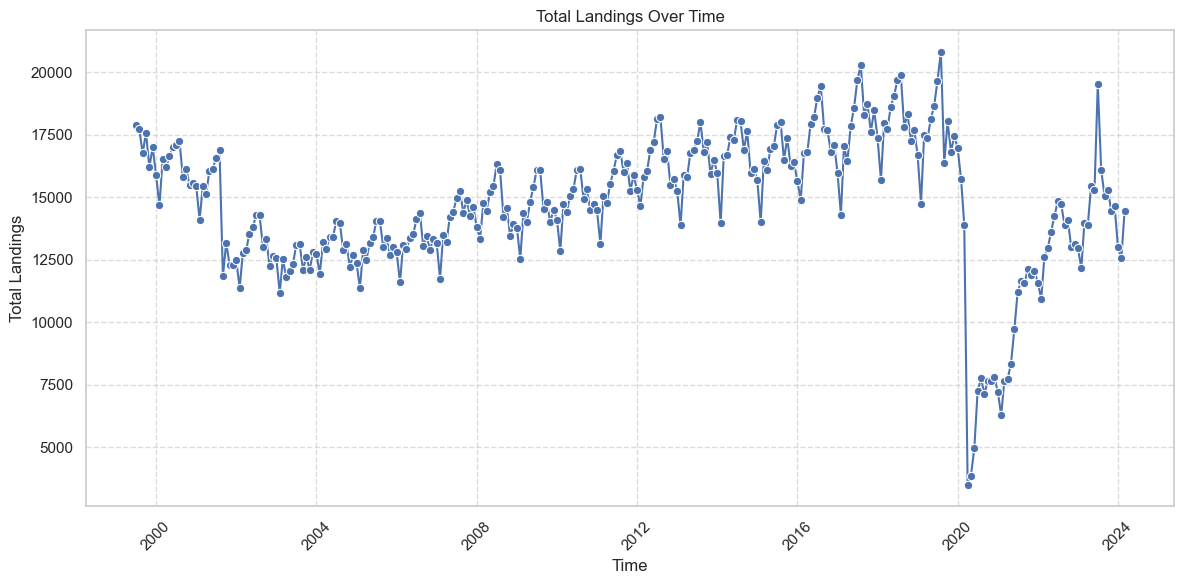

In [12]:
# Convert 'activity_period' to datetime format
df['activity_period'] = pd.to_datetime(df['activity_period'], format='%Y%m')

# Aggregate data by 'activity_period' if there are multiple entries per period
landing_over_time = df.groupby('activity_period')['landing_count'].sum().reset_index()

# Plotting the total number of landings over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='activity_period', y='landing_count', data=landing_over_time, marker='o')
plt.title('Total Landings Over Time')
plt.xlabel('Time')
plt.ylabel('Total Landings')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Check the descriptive statistics of total monthly landings.

landing_over_time.describe()

,activity_period,landing_count
count,297,297.000000
mean,2011-10-31 19:09:05.454545408,14733.033670
min,1999-07-01 00:00:00,3507.000000
25%,2005-09-01 00:00:00,13124.000000
50%,2011-11-01 00:00:00,14814.000000
75%,2018-01-01 00:00:00,16689.000000
max,2024-03-01 00:00:00,20809.000000
std,NaN,2735.072337


The output above shows that over the period from July 1999 to March 2024, the average number of landings per month at SFO is about 14,733. For the same period, the maximum number of landings in a month was 20,809, and the minimum number of landings was 3,507. The data shows that 75% of the monthly landings are less than or equal to 16,689 landings.

The data shows a general decrease in the number of landings from 1999 to 2003, with a significant reduction in monthly landings between 2001 and 2002. This reduction is most likely related to the decrease in travel following the 9/11 event in 2001. 

There was a general increase in the number of landings between 2003 and 2019. However, there was a significant drop in the number of landings between 2019 and 2020, likely due to travel and flight restrictions resulting from the COVID-19 pandemic. 

From 2020 to 2024, the number of landings showed a general increase. It is interesting to note that the number of flights has not yet returned to the levels observed prior to the pandemic period.

Understanding these trends helps us analyze the impact of major global events on air traffic and airport operations.


We will now continue the analysis by breaking out the data to show trends in the total landings for each year between July 1999 and March 2024. We present the trends on a grid chart below to allow easy observation of annual trends for each year. This visualization will help us identify specific patterns and variations in landings over the years.


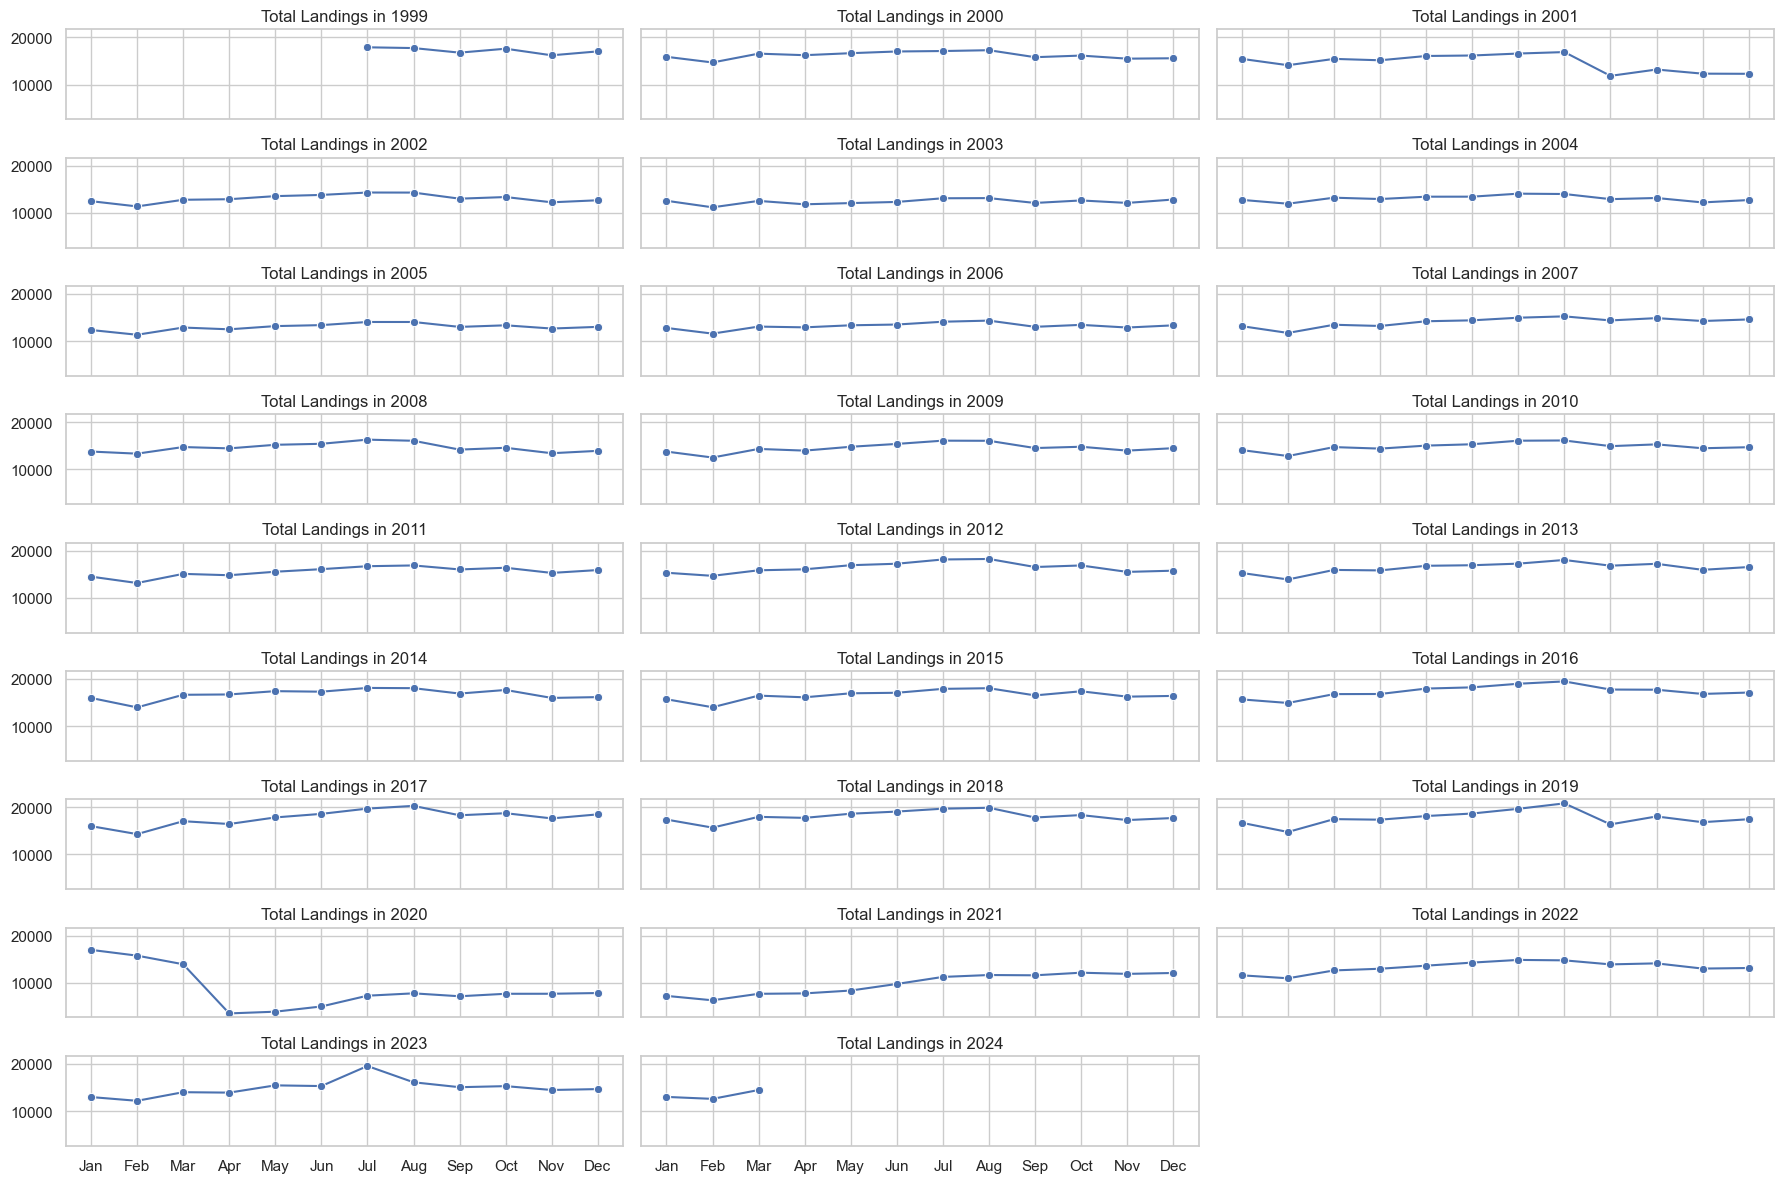

In [14]:
# Prepare a grid chart of total landings for each year

# Extract year and month
df['year'] = df['activity_period'].dt.year
df['month'] = df['activity_period'].dt.month

# Aggregate data by year and month
monthly_data = df.groupby(['year', 'month'])['landing_count'].sum().reset_index()

# Create a grid plot for individual years
years = monthly_data['year'].unique()
num_years = len(years)
num_cols = 3  # Define the number of columns in the grid
num_rows = (num_years // num_cols) + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12), sharex=True, sharey=True)

for i, year in enumerate(years):
    ax = axes[i // num_cols, i % num_cols]
    sns.lineplot(data=monthly_data[monthly_data['year'] == year], x='month', y='landing_count', marker='o', ax=ax)
    ax.set_title(f'Total Landings in {year}')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

The grid chart above highlights the seasonality of the data. It also shows stability in the total landings at SFO, with the exception of the 2020-2021 period.


We continue our analysis by combining the total landings across all years into one chart for easier comparison. This comprehensive view allows us to directly compare annual trends and identify any significant changes or patterns in landings over time.


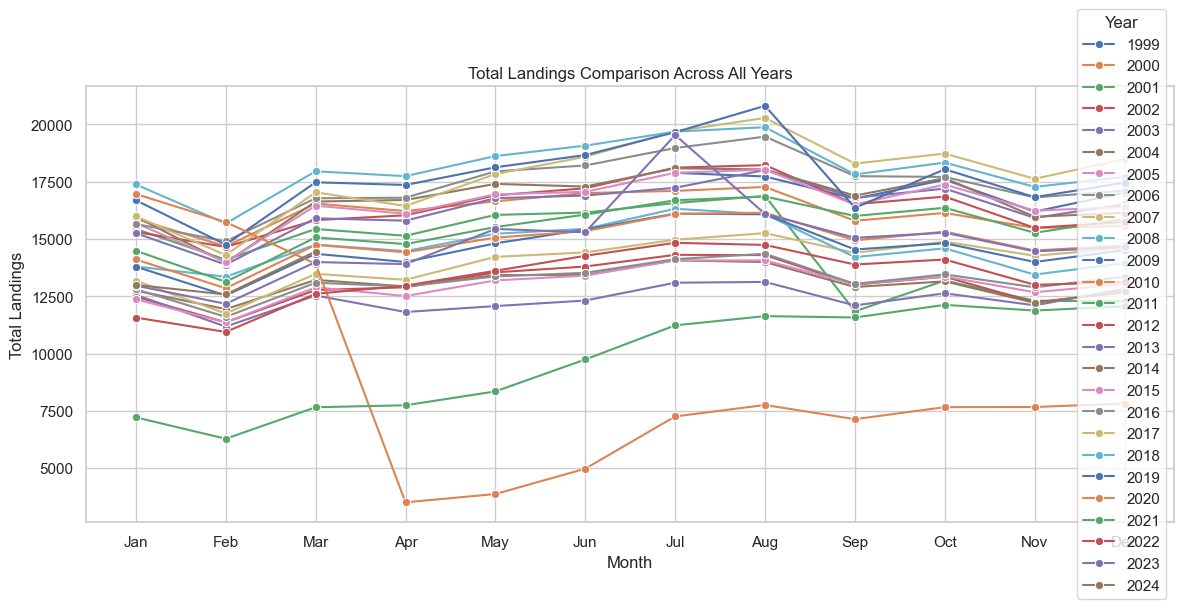

In [15]:
# Create a separate plot for all years combined
plt.figure(figsize=(12, 6))
for year in years:
    sns.lineplot(data=monthly_data[monthly_data['year'] == year], x='month', y='landing_count', marker='o', label=year)
plt.title('Total Landings Comparison Across All Years')
plt.xlabel('Month')
plt.ylabel('Total Landings')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='center right')
plt.grid(True)
plt.tight_layout()
plt.show()

The plots above highlight the trends in the number of landings each year. The seasonality in the data is evident in the total landings across all years. The general trend shows that landings start off high in January and drop in February. Landings then increase from February, reaching a peak in August, which coincides with the height of the summer season. After August, landings decline through November and then increase from November to December, coinciding with the winter holiday season.

These seasonal patterns provide valuable insights into the airport's operational dynamics and help in planning for peak travel periods and resource allocation.
  

## Airline Analysis

We now shift our analysis to examine the landings by different airlines. First, we will look at the total landings by airline for the top 30 airlines at SFO.
 

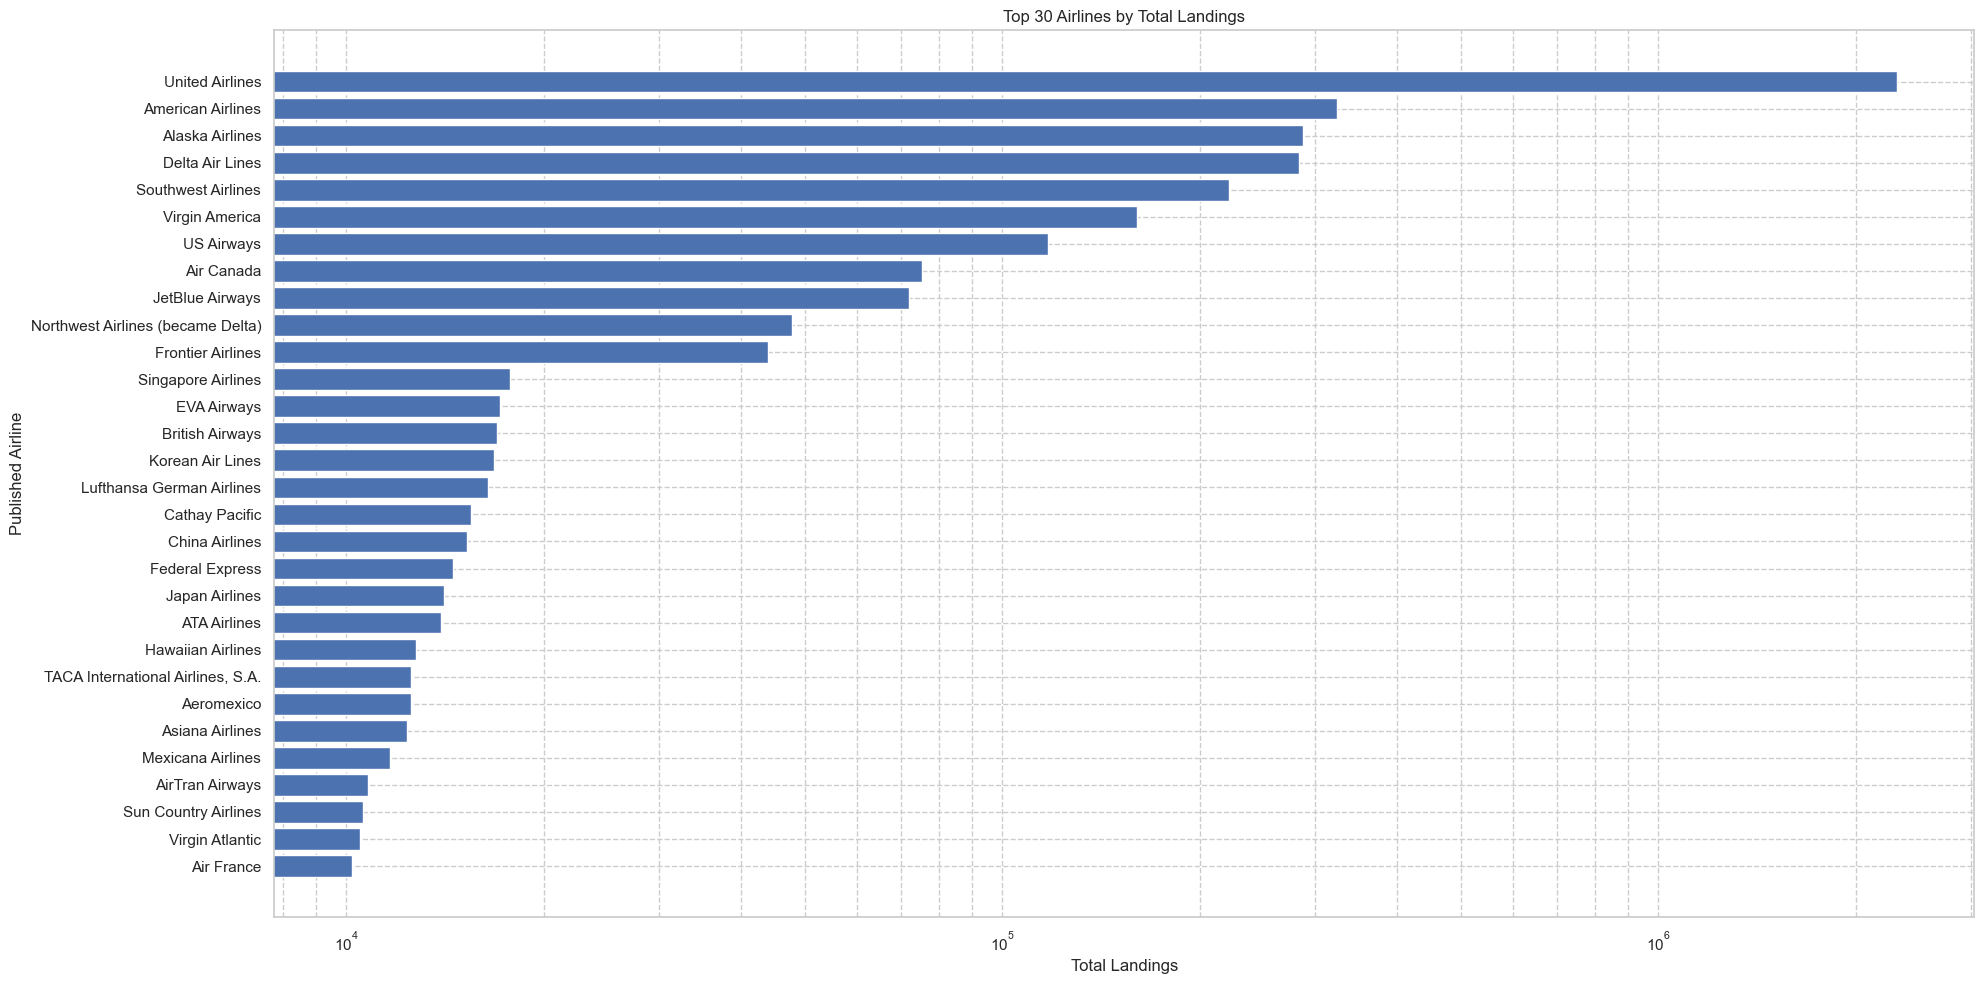

In [16]:
# Show only the top 30 airlines by total landings
top_n = 30

airline_landings = df.groupby('published_airline')['landing_count'].sum().reset_index()

top_airlines = airline_landings.sort_values(by='landing_count', ascending=False).head(top_n)

# Sort the DataFrame by landing_count in descending order
top_airlines = top_airlines.sort_values(by='landing_count', ascending=True)  # Sorting for bar plot

plt.figure(figsize=(20, 10))
plt.barh(top_airlines['published_airline'], top_airlines['landing_count'])
plt.title('Top 30 Airlines by Total Landings')
plt.ylabel('Published Airline')  # Switch the axis labels
plt.xlabel('Total Landings')
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.show()


The chart above shows that the top five airlines based on landings for the period under consideration are United Airlines, American Airlines, Alaska Airlines, Delta Airlines, and Southwest Airlines. This finding aligns with data from the SFO Fact Sheet (2022), which can be found at this [link](https://www.flysfo.com/about/about-sfo/sfo-fact-sheet). This consistency further strengthens the credibility of our analysis.

Understanding the top airlines by landings provides insights into the major players at SFO and helps in analyzing their operational patterns and contributions to the airport's overall traffic.


We now continue by conducting geographical analyses of landings at SFO. This will help us understand the distribution of landings across different regions and identify key patterns in regional air traffic.


## Airline Geographical Analysis

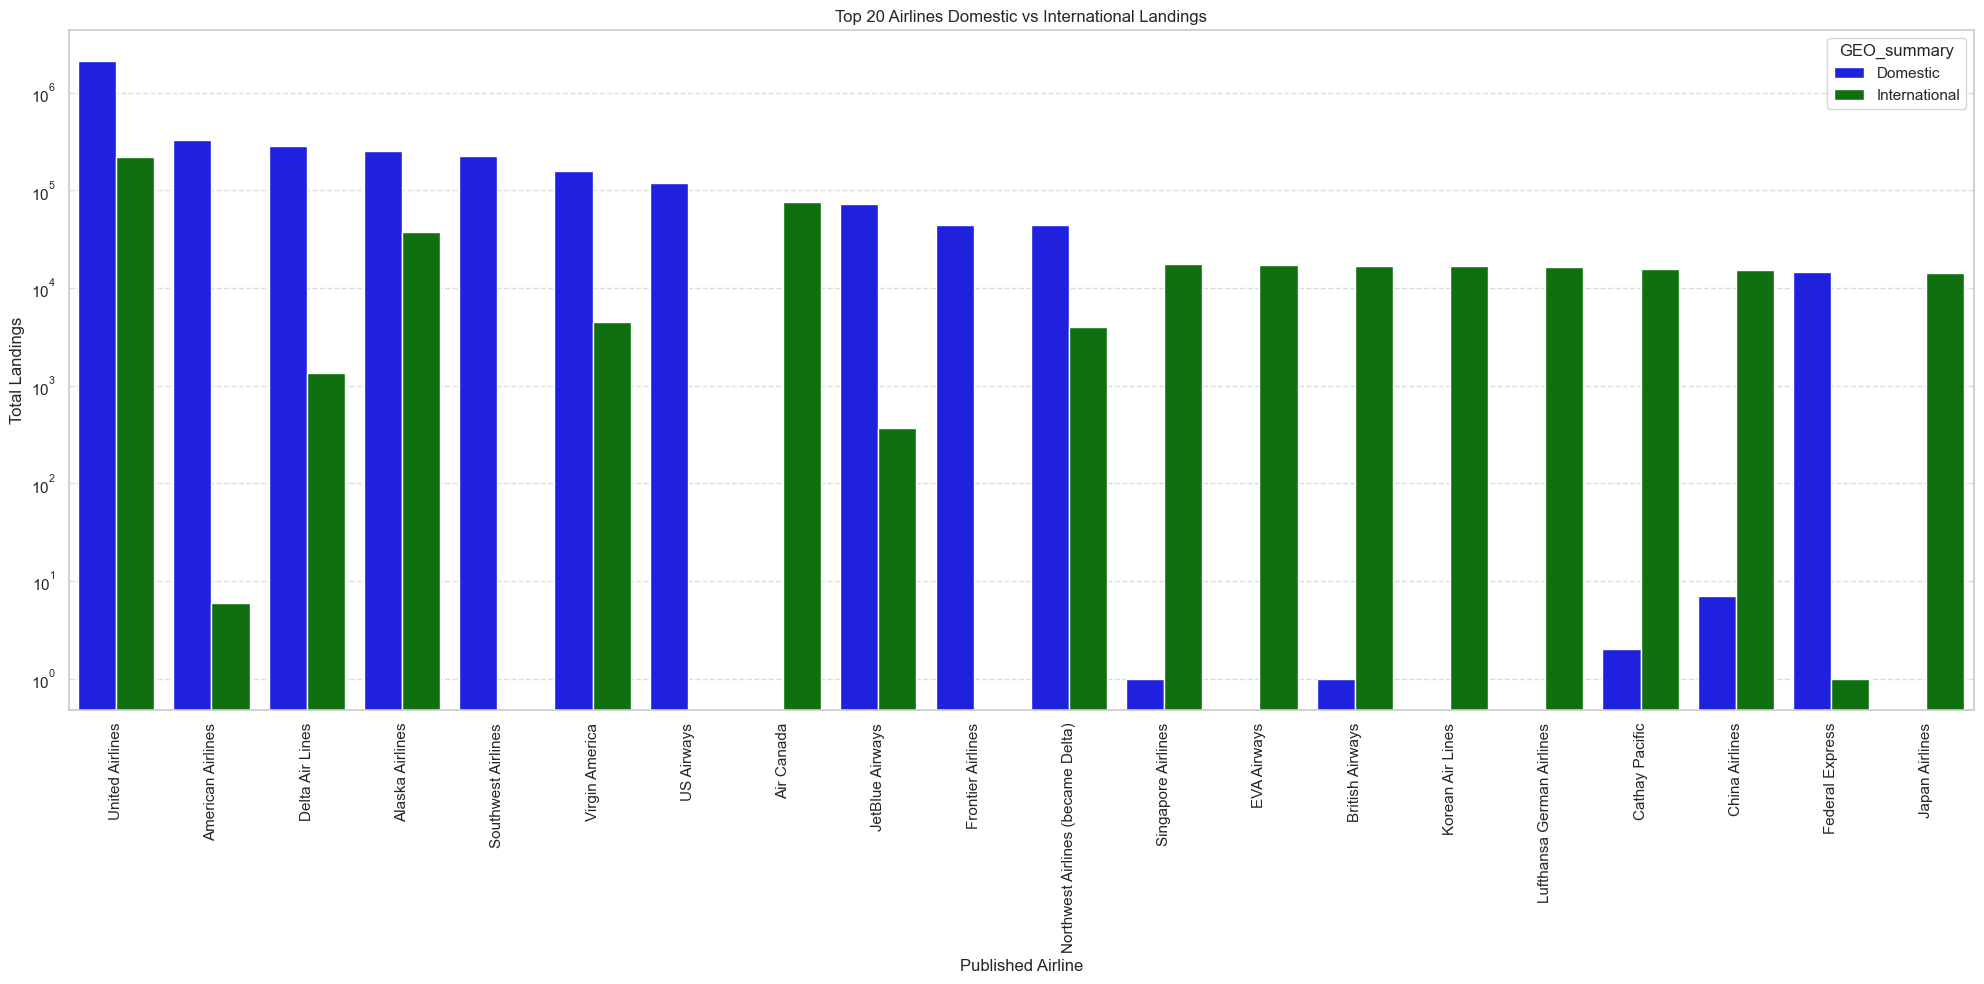

In [17]:
#  Compare the number of domestic and international landings for top 20 airlines.

top_n = 20
# Aggregate the data by published_airline and GEO_summary
geo_summary = df.groupby(['published_airline', 'GEO_summary'])['landing_count'].sum().reset_index()

# Identify the top 20 airlines based on total landings
totalgeo_landings = geo_summary.groupby('published_airline')['landing_count'].sum().reset_index()
topgeo_airlines = totalgeo_landings.sort_values(by='landing_count', ascending=False).head(top_n)['published_airline']

# Filter the geo_summary data to include only the top 20 airlines
top_geo = geo_summary[geo_summary['published_airline'].isin(topgeo_airlines)]

# Sorting for horizontal bar plot
top_geo = top_geo.sort_values(by='landing_count', ascending=False)  # Sorting for horizontal bar plot

# Set up the plotting area
plt.figure(figsize=(20, 10))

# Create a bar plot with different colors for domestic and international landings
sns.barplot(x='published_airline', y='landing_count', hue='GEO_summary', data=top_geo, palette=['blue', 'green'])

# Add titles and labels
plt.title('Top 20 Airlines Domestic vs International Landings')
plt.xlabel('Published Airline')
plt.ylabel('Total Landings')
plt.yscale('log')


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()



Here, we see that United Airlines accounts for the largest number of both domestic and international landings. The other top airlines responsible for domestic landings are Delta Airlines, Southwest Airlines, American Airlines, Alaska Airlines, and Virgin America. The other top airlines with international landings are Air Canada, British Airways, Lufthansa, China Airlines, and Korean Air.
 

We continue our analysis by exploring the number of landings by region. This will help us understand the major regions that provide connections to SFO, highlighting the airport's role in global and domestic air travel.


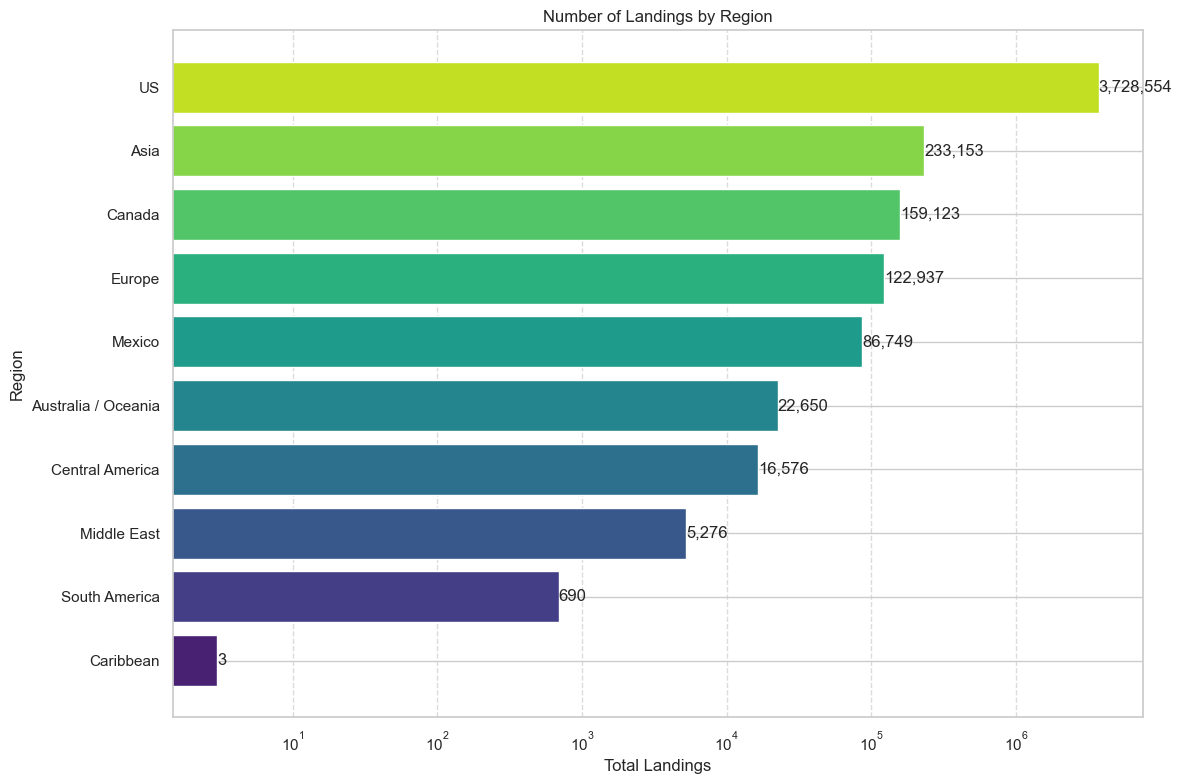

In [18]:
# Number of landings by region
# Aggregate the data by GEO_region
total_geo_landings = df.groupby('GEO_region')['landing_count'].sum().reset_index()

# Sort the DataFrame by total_geo_landings in descending order
total_geo_landings = total_geo_landings.sort_values(by='landing_count', ascending=True)  # Sorting for horizontal bar plot

# Set up the plotting area
plt.figure(figsize=(12, 8))


# Create a horizontal bar plot
bars = plt.barh(total_geo_landings['GEO_region'], total_geo_landings['landing_count'], color=sns.color_palette('viridis', len(total_geo_landings)))

# Add title and labels
plt.title('Number of Landings by Region')
plt.xlabel('Total Landings')
plt.ylabel('Region')

# Apply logarithmic scale to x-axis
plt.xscale('log')

# Add horizontal gridlines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

#Show value labels on the bars with the actual landing counts
for index, value in enumerate(total_geo_landings['landing_count']):
    plt.text(value, index, f'{value:,.0f}', va='center', ha='left')


# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()



The chart above shows that the top landings by region at SFO are from U.S. domestic flights, followed by flights from Asia, Canada, and Europe.
This finding helps identify critical areas of connectivity and the geographical spread of air traffic at SFO.


## Aircraft Segmentation Analysis

### landings by landing Aircraft Type

We now explore landings by aircraft type. Analyzing landings by aircraft type informs us about the major types of clients served at SFO, whether they are passenger, cargo, or other types of flights. This analysis helps us understand the diversity of operations at the airport.

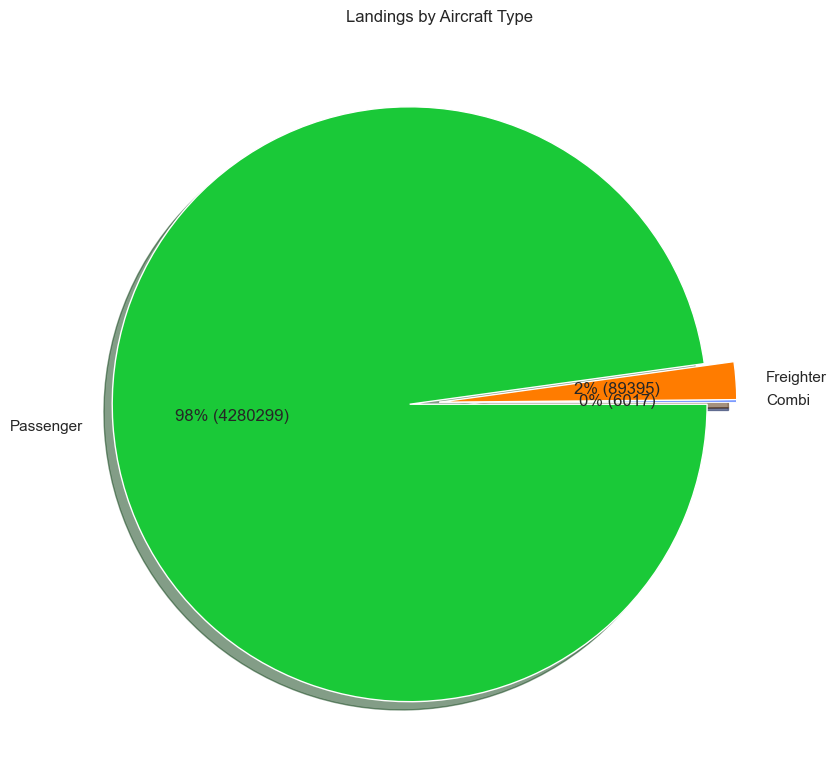

In [19]:
# landings by landing Aircraft Type

# Group the data by landing_aircraft_type
total_type_landings = df.groupby('landing_aircraft_type')['landing_count'].sum().reset_index()

# Define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Explode the slices 
explode = [0.1 if i == total_type_landings['landing_count'].max() else 0 for i in total_type_landings['landing_count']]

# Plotting data on chart
plt.figure(figsize=(10, 8))
plt.pie(total_type_landings['landing_count'], 
        labels=total_type_landings['landing_aircraft_type'], 
        colors=palette_color, 
        autopct=lambda p: f'{p:.0f}% ({p * sum(total_type_landings["landing_count"]) / 100:.0f})',
        explode=explode,
        shadow=True)

# Add title
plt.title('Landings by Aircraft Type')

# Display chart
plt.tight_layout()
plt.show()


The chart above shows that passenger aircraft account for 98% of the landings at SFO, while freighter and combi aircraft account for the remaining 2%.

This distribution highlights the predominance of passenger flights at SFO, indicating that the airport primarily serves passenger traffic, with a smaller proportion dedicated to cargo operations.


### Landings by Aircraft Manufacturer

We now take a look at the distribution of aircraft manufacturers related to landings at SFO. This analysis will help us identify the predominant manufacturers and their contributions to the airport's operations.


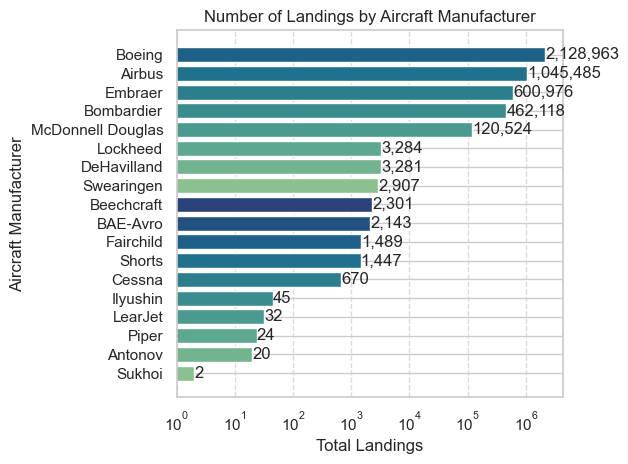

In [20]:
#Landings by aircraft manufacturer

# Group the data by aircraft_manufacturer
total_manf_landings = df.groupby('aircraft_manufacturer')['landing_count'].sum().reset_index()

# Sort the DataFrame by total_manf_landings in descending order
total_manf_landings = total_manf_landings.sort_values(by='landing_count', ascending=True)  # Sorting for horizontal bar plot

# Create a horizontal bar plot
bars = plt.barh(total_manf_landings['aircraft_manufacturer'], total_manf_landings['landing_count'], color=sns.color_palette("crest", len(total_geo_landings)))

# Add title and labels
plt.title('Number of Landings by Aircraft Manufacturer')
plt.xlabel('Total Landings')
plt.ylabel('Aircraft Manufacturer')

# Apply logarithmic scale to x-axis
plt.xscale('log')

# Add horizontal gridlines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show value labels on the bars with the actual landing counts
for index, value in enumerate(total_manf_landings['landing_count']):
    plt.text(value, index, f'{value:,.0f}', va='center', ha='left')

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()


Boeing, Airbus, Embraer, Bombardier, and McDonnell Douglas are the top five aircraft manufacturers responsible for landings at SFO. During the period under review, more than 2 million landings were from Boeing-manufactured aircraft.

This highlights Boeing's significant presence at SFO, indicating its dominance in the market and preference among airlines operating at the airport.


### Landings by Aircraft Model

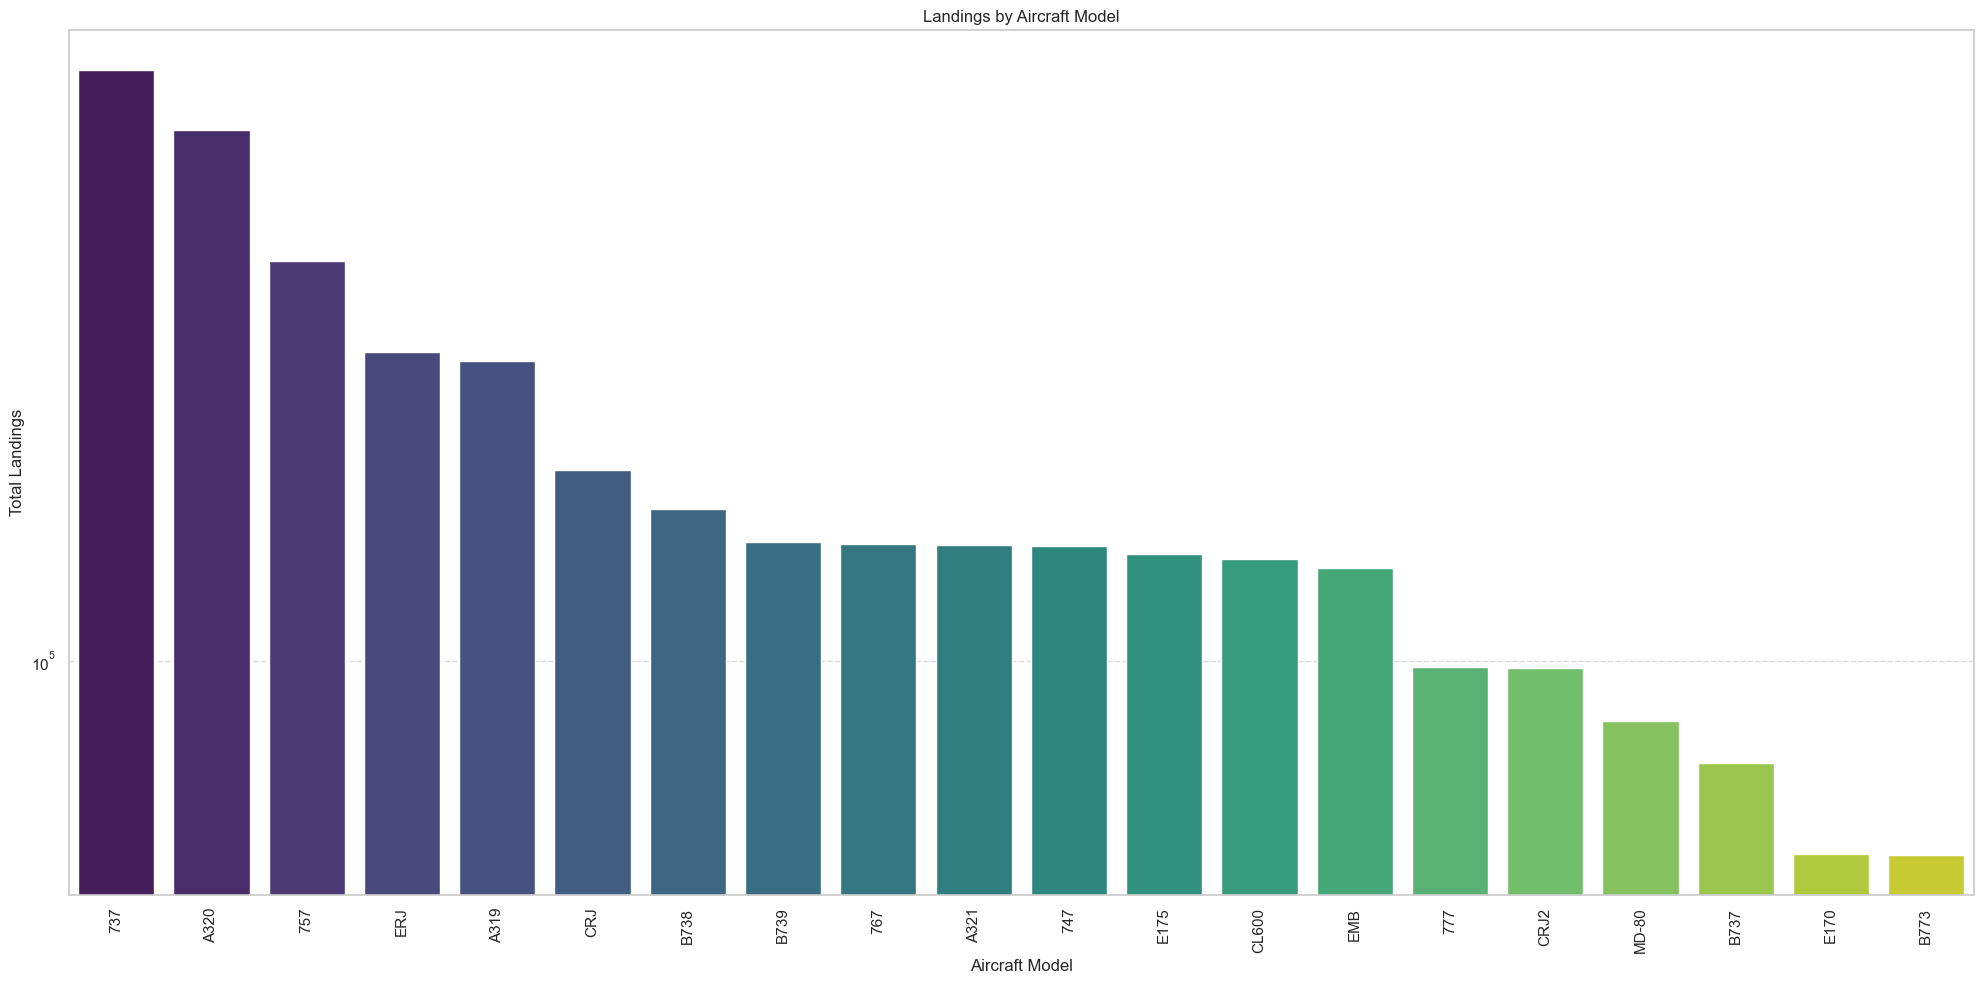

In [21]:
# Group the data by aircraft_model
total_model_landings = df.groupby('aircraft_model')['landing_count'].sum().reset_index()

# Sort by landing_count and select the top 20 aircraft models
top_n = 20
top_model_landings = total_model_landings.sort_values(by='landing_count', ascending=False).head(top_n)

# Set up the plotting area
plt.figure(figsize=(20, 10))

# Create a bar plot for the top 20 aircraft models
sns.barplot(x='aircraft_model', y='landing_count', data=top_model_landings, palette='viridis', hue='aircraft_model', dodge=False)

# Add titles and labels
plt.title('Landings by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Landings')
plt.yscale('log')  # Apply logarithmic scale to y-axis

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove the legend since it's not necessary when using hue for coloring only
plt.legend([],[], frameon=False)

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()


The output above indicates that the top five aircraft models landing at SFO are the Boeing 737, Airbus A320, Boeing 757, Embraer ERJ, and Airbus A319.

This information highlights the most frequently used aircraft models at SFO, providing insights into the types of aircraft the airport regularly accommodates.


### Landings by Aircraft Body Tpye

In [22]:
# Landings by Aircraft Body Tpye

# Group the data by aircraft_boby_type and sum the landing_count
total_type_landings = df.groupby('aircraft_body_type')['landing_count'].sum().reset_index()

# Verify the aggregated data
print(total_type_landings)


  aircraft_body_type  landing_count
0        Narrow Body        2648454
1       Regional Jet         704237
2         Turbo Prop         363505
3          Wide Body         659515


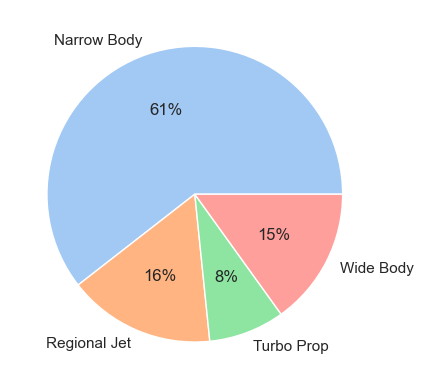

In [23]:
# Pie chart of landings by aircraft body type

# define Seaborn color palette to use 
palette_color = sns.color_palette("pastel") 
 
# plotting data on chart 
plt.pie(total_type_landings['landing_count'], labels = total_type_landings['aircraft_body_type'], colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

The results above show that, for the period under review, 61% of the landings at SFO were narrow-body aircraft, 16% were regional jets, 15% were wide-body aircraft, and 8% were turboprop planes.

This distribution provides insights into the types of aircraft most commonly operating at SFO, indicating a predominance of narrow-body and regional jets, which are typically used for short to medium-haul flights.


## Airport Operations

## Domestic vs International Landings

In [24]:
# Domestic vs international flights from SFO

# Group the data by GEO_summary and sum the landing_count
total_landings = df.groupby('GEO_summary')['landing_count'].sum().reset_index()

# Verify the aggregated data
print(total_landings)

     GEO_summary  landing_count
0       Domestic        3723498
1  International         652213


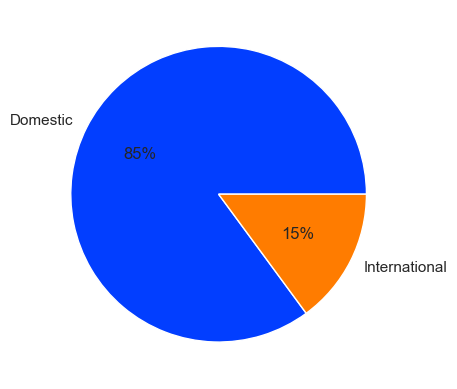

In [25]:
# Pie Chart of Domestic vs International

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
 
# plotting data on chart 
plt.pie(total_landings['landing_count'], labels = total_landings['GEO_summary'], colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

The results above show that, for the period under review, 85% of landings at SFO were domestic flights, whereas 15% were international flights.

This indicates a strong focus on domestic travel at SFO, with a smaller but significant portion of international flights contributing to the airport's traffic. The [SFO Fact Sheet 2022](https://www.flysfo.com/about/about-sfo/sfo-fact-sheet) shows that for the calendar year 2022, 76% of flights at SFO were domestic flights, while 24% were international. 
 

### Total Landed Weight trends over Time

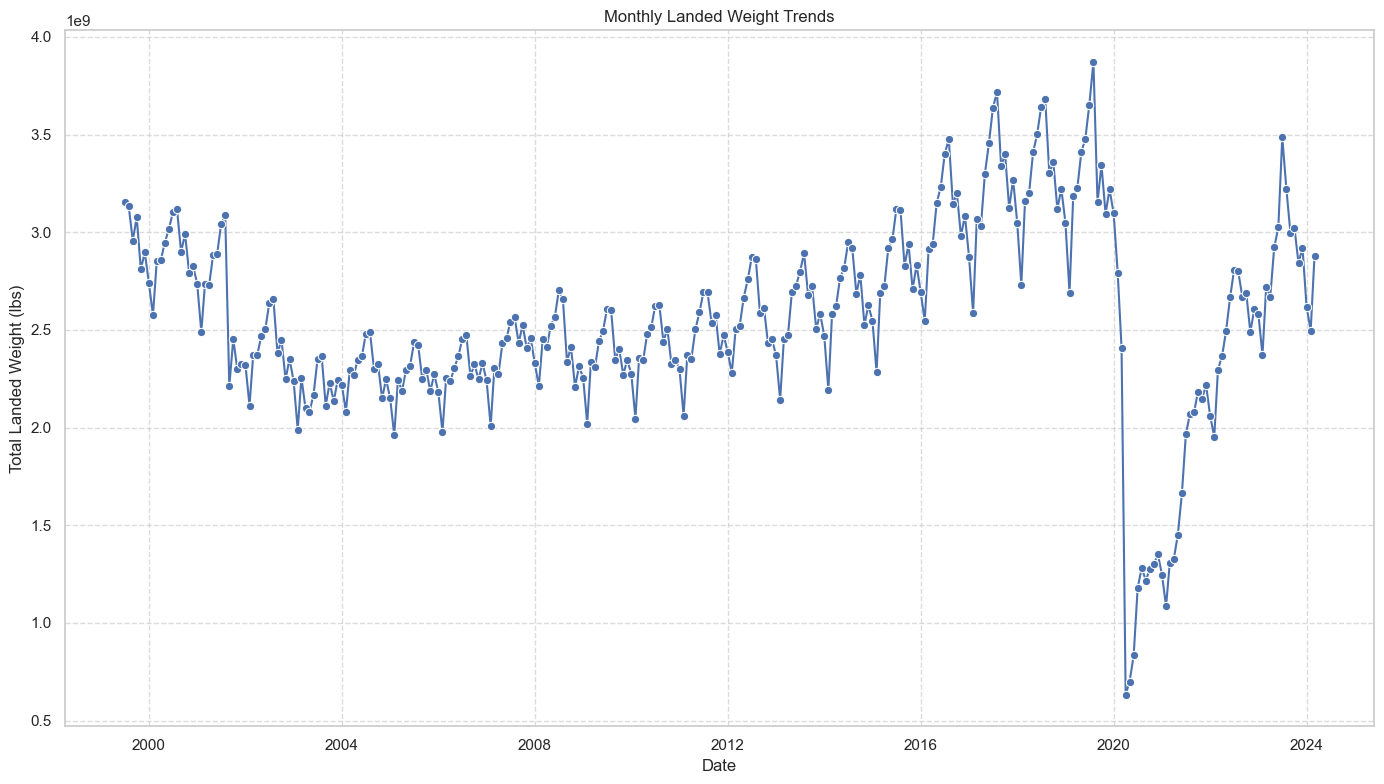

In [26]:
# Total landed weight over time
# Extract year and month from 'activity_period'
df['year'] = df['activity_period'].dt.year
df['month'] = df['activity_period'].dt.month

# Aggregate the data by year and month
monthly_landed_weight = df.groupby(['year', 'month'])['total_landed_weight'].sum().reset_index()

# Create a datetime column for plotting
monthly_landed_weight['date'] = pd.to_datetime(monthly_landed_weight[['year', 'month']].assign(day=1))

# Set up the plotting area
plt.figure(figsize=(14, 8))

# Create a line plot for monthly landing trends
sns.lineplot(x='date', y='total_landed_weight', data=monthly_landed_weight, marker='o')

# Add title and labels
plt.title('Monthly Landed Weight Trends')
plt.xlabel('Date')
plt.ylabel('Total Landed Weight (lbs)')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()





From the chart above, we can see that the trends in the total monthly landed weight mimic the trends of total landing counts at SFO for the period under review.

This similarity suggests that variations in the number of landings directly influence the total landed weight, highlighting the consistent relationship between these two metrics.


### Confirming the relationship between the total landing_counts and total landed weight

In [27]:
print(df['landing_count'].corr(df['total_landed_weight']))

0.7762974860259974


The results above show a Pearson correlation coefficient value of 0.776 for the relationship between `landing_count` and `total_landed_weight`. This indicates a strong positive relationship between the total number of landings and the total landed weight, which is to be expected.

This strong correlation suggests that as the number of landings increases, the total landed weight also increases proportionally, reinforcing the direct connection between these two metrics.
  

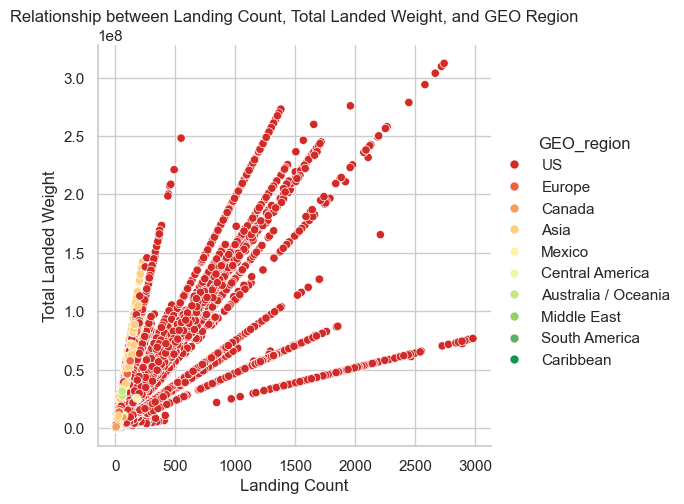

In [28]:
# Relationship between The number of landings and total landed weight

# Correct the hue parameter to use the column name 'GEO_region' directly
sns.relplot(data=df, x='landing_count', y='total_landed_weight', hue='GEO_region', palette='RdYlGn')

# Add titles and labels
plt.title('Relationship between Landing Count, Total Landed Weight, and GEO Region')
plt.xlabel('Landing Count')
plt.ylabel('Total Landed Weight')

# Show the plot
plt.show()


The scatter plot above further confirms the strong positive relationship between `landing_count` and `total_landed_weight`. In this scatter plot, `GEO_Region` was added as a third variable to visualize the impact of the region on the relationship. The strong influence of U.S. domestic flights can be clearly seen in this plot.

This visualization highlights how regional variations contribute to the overall relationship between landings and landed weight, with U.S. domestic flights playing a significant role.


### Top 10 airlines total landed weight by airline and aircraft type

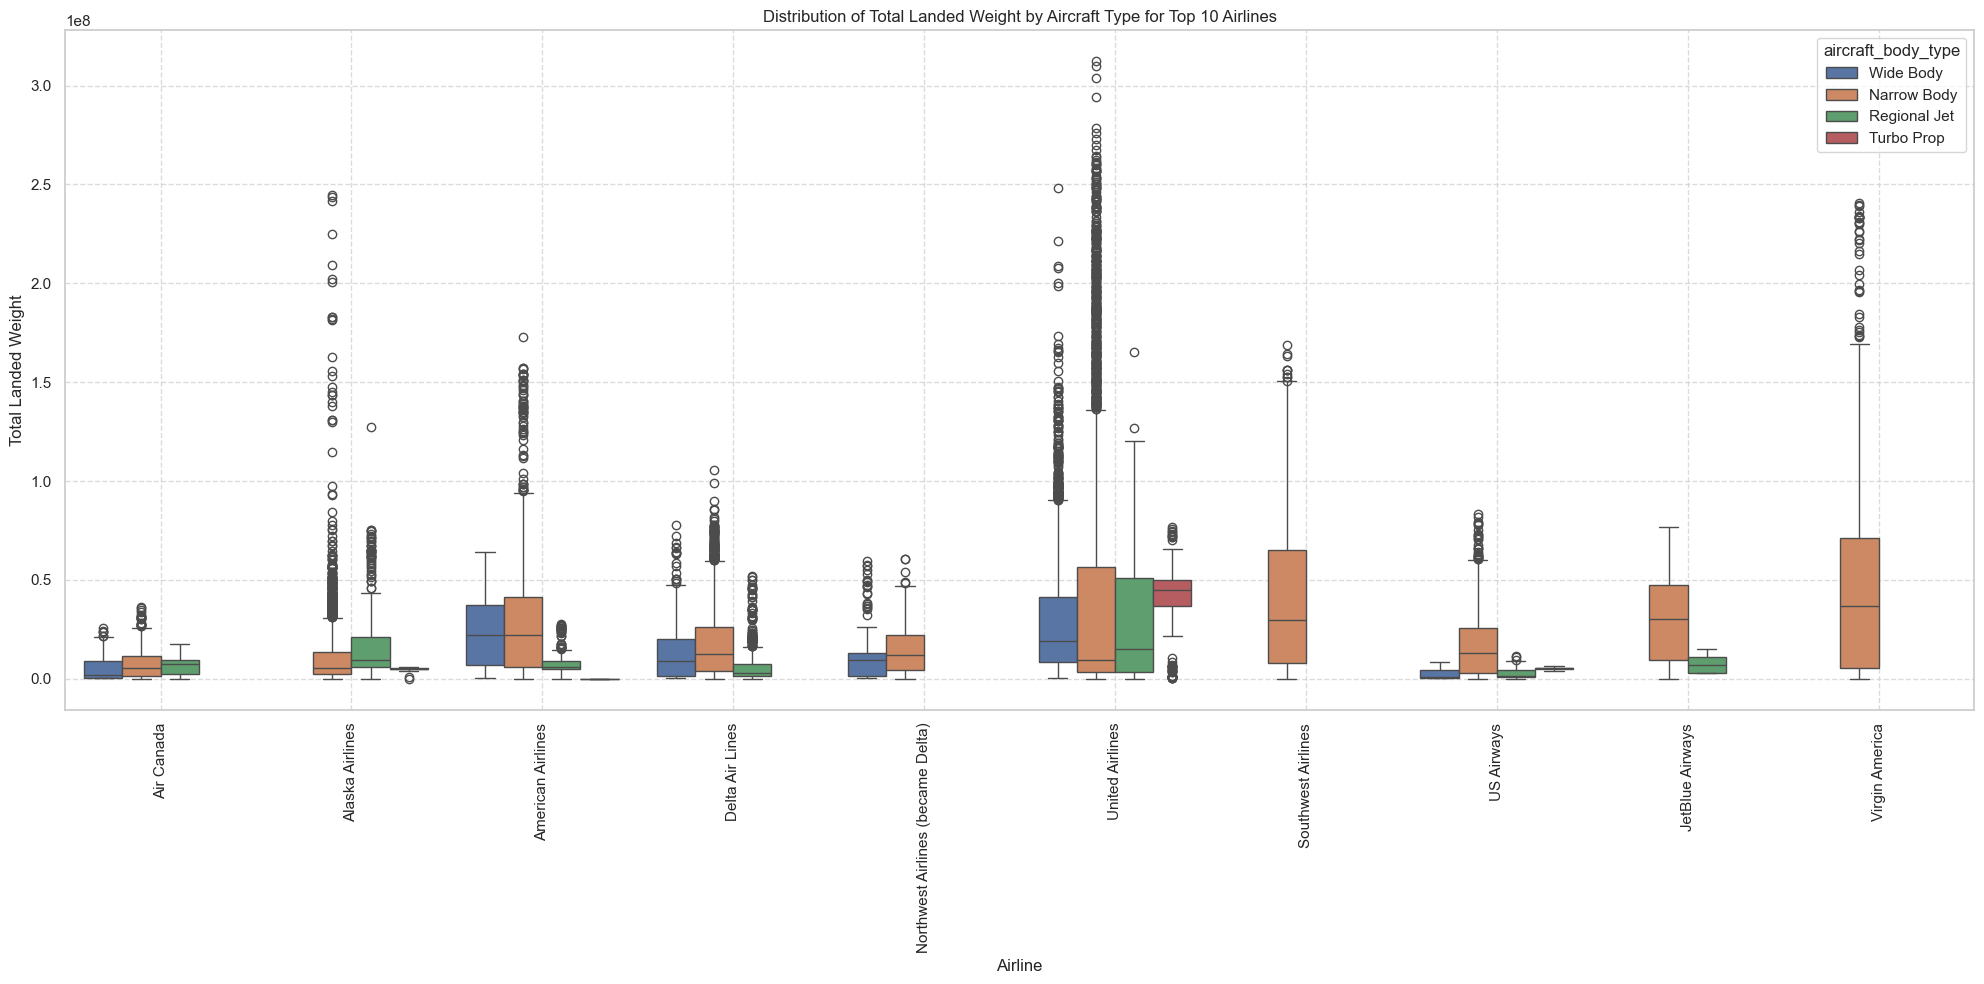

In [29]:
# Total landed weight by airline and aircraft type for the top 10 airlines

# Aggregate the data by published_airline to get total landings for each airline
total_landings_by_airline = df.groupby('published_airline')['landing_count'].sum().reset_index()

# Sort the airlines by total landings and select the top 10
top_10_airlines = total_landings_by_airline.sort_values(by='landing_count', ascending=False).head(10)['published_airline']

# Filter the original dataframe to include only the top 20 airlines
df_top_10 = df[df['published_airline'].isin(top_10_airlines)]

# Set up the plotting area
plt.figure(figsize=(20, 10))

# Create a box plot for total landed weight by airline and aircraft type
sns.boxplot(x='published_airline', y='total_landed_weight', hue='aircraft_body_type', data=df_top_10)

# Add titles and labels
plt.title('Distribution of Total Landed Weight by Aircraft Type for Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Total Landed Weight')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()


### Average number of landings per month for the top 10 airlines

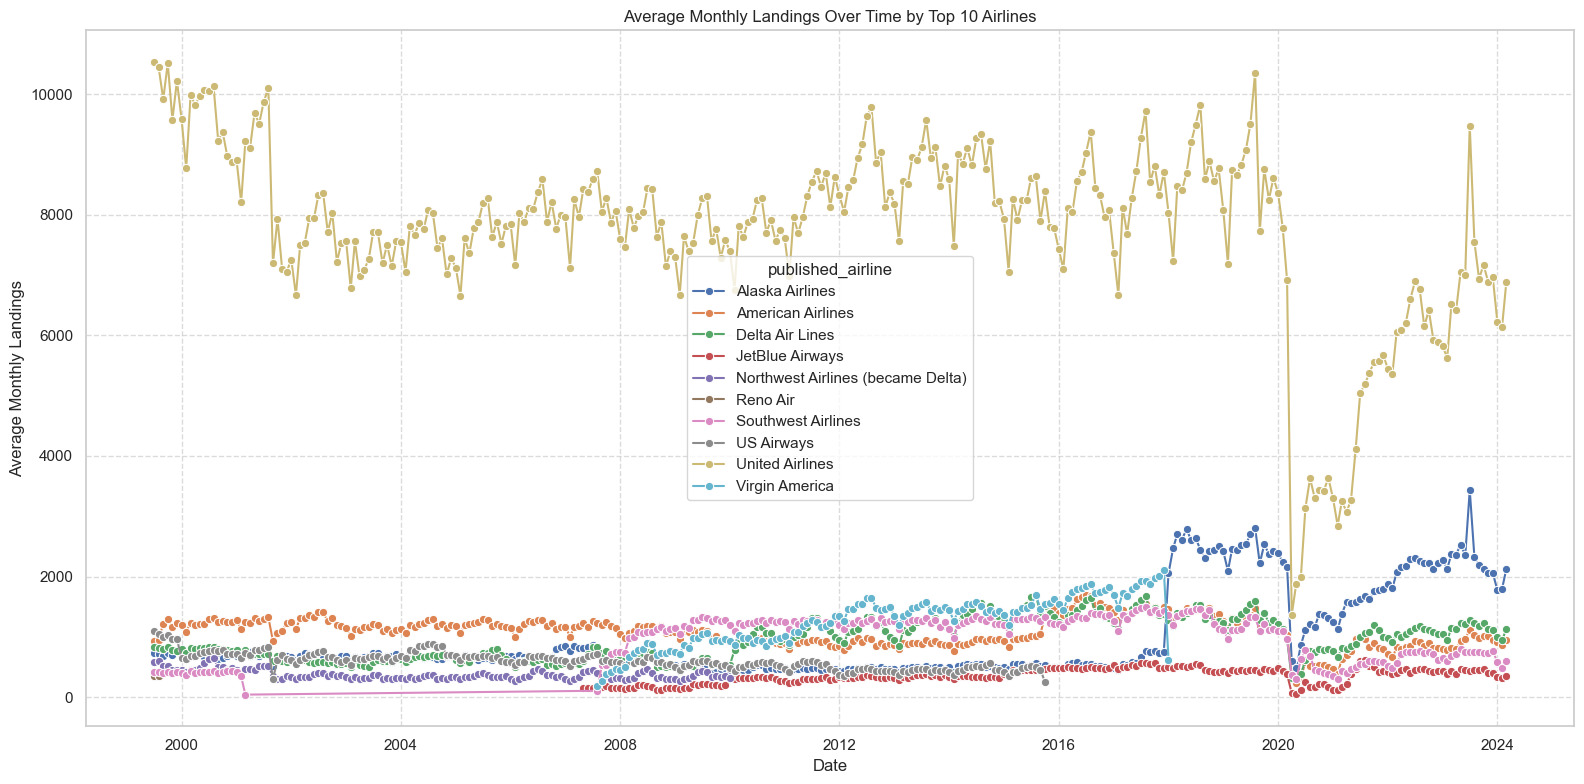

In [30]:
# Average number of landings per month for the top 10 airlines

# Aggregate data to get total monthly landings for each airline
monthly_landings = df.groupby(['published_airline', 'year', 'month'])['landing_count'].sum().reset_index()

# Calculate the average monthly landings for each airline
average_monthly_landings = monthly_landings.groupby('published_airline')['landing_count'].mean().reset_index()
average_monthly_landings.rename(columns={'landing_count': 'average_monthly_landings'}, inplace=True)

# Identify the top 10 airlines by average monthly landings
top_10_airlines = average_monthly_landings.sort_values(by='average_monthly_landings', ascending=False).head(10)

# Filter the original dataframe to include only the top 10 airlines
df_top_10 = df[df['published_airline'].isin(top_10_airlines['published_airline'])]

# Calculate the average monthly landings over time for the top 10 airlines
monthly_average_over_time = monthly_landings[monthly_landings['published_airline'].isin(top_10_airlines['published_airline'])]
monthly_average_over_time = monthly_average_over_time.groupby(['published_airline', 'year', 'month'])['landing_count'].mean().reset_index()

# Create a datetime column for plotting
monthly_average_over_time['date'] = pd.to_datetime(monthly_average_over_time[['year', 'month']].assign(day=1))

# Set up the plotting area
plt.figure(figsize=(16, 8))

# Create a line plot for average monthly landings over time for the top 10 airlines
sns.lineplot(x='date', y='landing_count', hue='published_airline', data=monthly_average_over_time, marker='o')

# Add titles and labels
plt.title('Average Monthly Landings Over Time by Top 10 Airlines')
plt.xlabel('Date')
plt.ylabel('Average Monthly Landings')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()



### The Growth of Landings Over Time

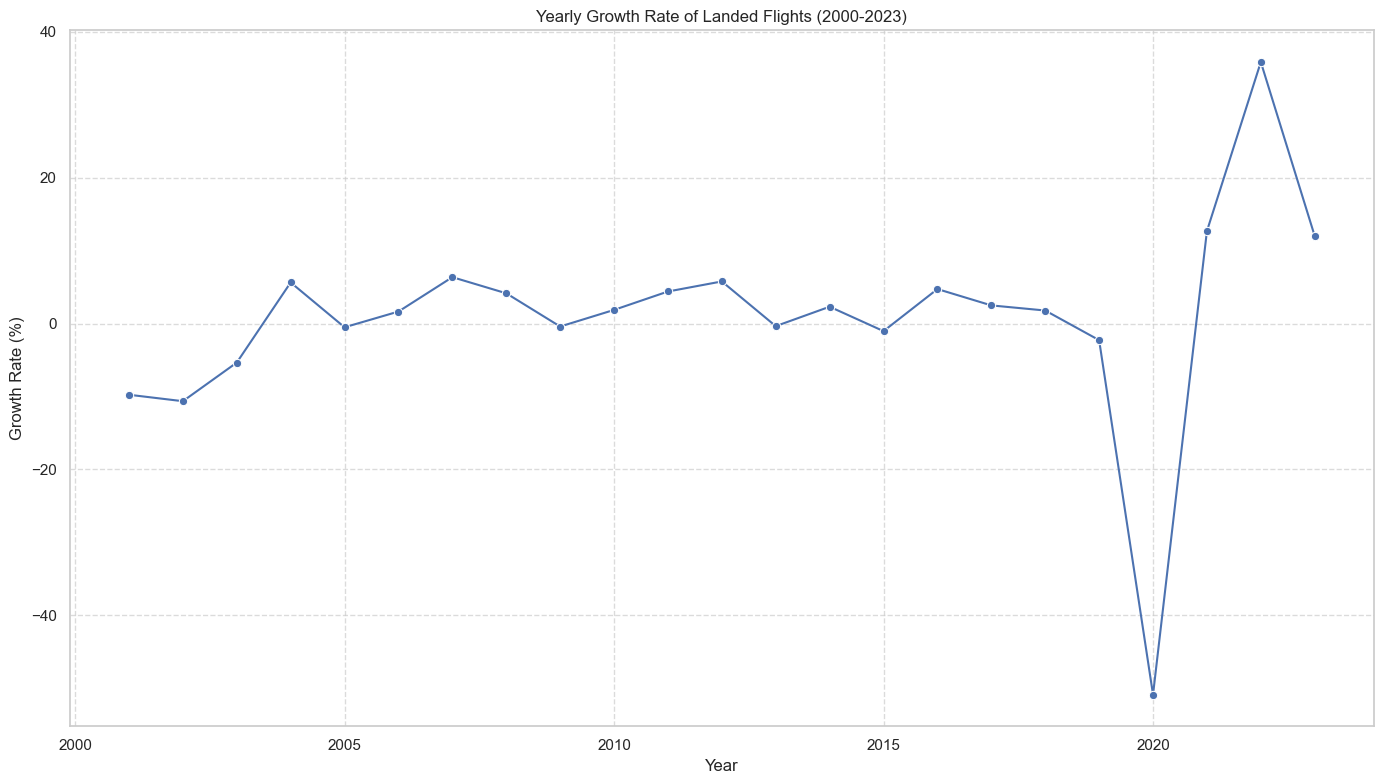

In [31]:
#The growth rate of landings over time

# Exclude the years 1999 and 2024
df_filtered = df[(df['year'] > 1999) & (df['year'] < 2024)]

# Aggregate data to get total landings for each year, excluding 1999 and 2024
yearly_landings = df_filtered.groupby('year')['landing_count'].sum().reset_index()

# Calculate the yearly growth rate
yearly_landings['growth_rate'] = yearly_landings['landing_count'].pct_change() * 100  # Convert to percentage

# Set up the plotting area
plt.figure(figsize=(14, 8))

# Create a line plot for yearly growth rate
sns.lineplot(x='year', y='growth_rate', data=yearly_landings, marker='o')

# Add titles and labels
plt.title('Yearly Growth Rate of Landed Flights (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
yearly_landings.describe()

,year,landing_count,growth_rate
count,24.000000,24.000000,23.000000
mean,2011.500000,176355.000000,0.901002
std,7.071068,28701.322883,14.446194
min,2000.000000,104251.000000,-50.870885
25%,2005.750000,158059.750000,-0.764048
50%,2011.500000,176924.500000,1.882467
75%,2017.250000,197297.750000,5.194310
max,2023.000000,217116.000000,35.871268


The results above of the growth rate of landed flights from 2000 to 2023 show that the growth of landings at SFO has been relatively stable over the period. The average rate of landings growth over the period is 0.9%. The maximum growth rate is 35.87%, and the minimum rate was a decline of 50.87% due to the pandemic. This minimum value affects the reported average growth rate. 75% of the data shows a growth rate of about 5.19%. The drastic impact of the COVID-19 pandemic is evident in this visualization. The most significant period of growth seems to be between the years 2021 and 2022.


# Conclusion

We explored aircraft landing data from SFO from July 1997 to March 2024. Our main objective was to gain a deeper understanding of the airport's operational dynamics, capacity requirements, and potential areas for improvement.

Our data exploration yielded significant findings: the average number of landings per month at SFO during the review period was approximately 14,733, a key metric for understanding operational capacity. Our analysis revealed distinct patterns, including seasonality in landings and the profound influence of significant events such as the 9/11 attacks in 2001 and the ongoing COVID-19 pandemic on aircraft landings at SFO. Notably, even after nearly three years since the pandemic began, average monthly landings at SFO have not fully recovered to pre-pandemic levels. We also identified the leading airlines serving SFO, with United Airlines at the forefront, followed by American Airlines, Alaska Airlines, Delta Airlines, and Southwest Airlines.

### Key Findings
- **Average Landings**: Approximately 14,733 landings per month.
- **Seasonality and Events**:
  - Significant patterns, including seasonality.
  - Impact of events such as the 9/11 attacks and the COVID-19 pandemic.
  - Post-pandemic recovery: Average monthly landings have not returned to pre-pandemic levels.
- **Leading Airlines**:
  - United Airlines
  - American Airlines
  - Alaska Airlines
  - Delta Airlines
  - Southwest Airlines

During the review period, 85% of landings at SFO were from domestic flights, and 15% were from international flights. SFO serves as a primary gateway to Asia, Canada, and Europe. Regarding aircraft type, 98% of the landings were passenger flights, with the remaining 2% being cargo and combi landings. Our analysis identified Boeing, Airbus, Embraer, Bombardier, and McDonnell Douglas as the top five aircraft manufacturers contributing to landings at SFO, with the Boeing 737 being the most common model. Other significant aircraft models include the Airbus A320, Embraer ERJ, and Boeing 757. In terms of body type, 61% of landings were by narrow-body aircraft, 16% by regional jets, 15% by wide-body aircraft, and the rest by turboprop planes.

### Flight and Aircraft Analysis
- **Flight Origin**:
  - 85% Domestic flights.
  - 15% International flights, primarily from Asia, Canada, and Europe.
- **Aircraft Type**:
  - 98% Passenger flights.
  - 2% Cargo and combi landings.
- **Top Aircraft Manufacturers**:
  - Boeing
  - Airbus
  - Embraer
  - Bombardier
  - McDonnell Douglas
- **Common Models**:
  - Boeing 737
  - Airbus A320
  - Embraer ERJ
  - Boeing 757
- **Body Type**:
  - 61% Narrow-body aircraft
  - 16% Regional jets
  - 15% Wide-body aircraft
  - Remaining by turboprop planes

The results also indicate that the total landed weight follows a very similar trend to the number of landings at SFO and that there is a strong correlation (r = 0.776) between the total landed weight and the number of landings. Finally, we found that the average rate of growth of landings at SFO is about 0.9% per year. However, this value is adversely affected by the unprecedented 50% decline in landings during the COVID-19 pandemic. For the period under review, 75% of the data shows an increase of about 5.19% per year. This is a very encouraging metric concerning the operations at SFO.

### Operational Insights
- **Landed Weight**:
  - Strong correlation (r = 0.776) between total landed weight and number of landings.
- **Growth Rate**:
  - Average growth rate of landings: 0.9% per year.
  - Pandemic impact: 50% decline in landings.
  - Pre-pandemic growth: 5.19% per year for 75% of the data.

Our analysis provides valuable insights into SFO's operations, which can assist airport administration and other stakeholders in making informed operational decisions for SFO and similar international airports. These insights highlight the impact of major events on airport operations and underscore the importance of strategic planning and adaptability in the aviation industry.

